# Aga Patro - lab 5

## Zadanie 1. Zaimplementuj algorytm wyszukiwania wzorca 2-wymiarowego

In [9]:
def get_columns(pattern):
    """
    Returns columns, indexes and alphabet of pattern.
    :param pattern: pattern to find
    :return: columns -> list of columns of pattern
             indexes -> indexes of columns in columns
             alphabet -> unique tokens in pattern
    """

    columns, indexes = [], []
    alphabet = set()

    for column in zip(*pattern):
        if column in columns:
            index = columns.index(column)
            indexes.append(index)
        else:
            columns.append(column)
            indexes.append(len(columns) - 1)

        alphabet.update(column)

    return columns, indexes, alphabet


def create_vertical_automaton(columns, alphabet):
    """
    Creates vertical automaton.
    :param columns: columns of pattern
    :param alphabet: unique tokens in pattern
    :return: transition_table -> transition table of vertical automaton
             words -> words of vertical automaton
    """

    transition_table = [{}]
    words = [[]]
    states = [0] * len(columns)

    for j, column in enumerate(zip(*columns)):
        for i, letter in enumerate(column):
            if letter in transition_table[states[i]]:
                states[i] = transition_table[states[i]][letter]
            else:
                new_state = len(transition_table)
                transition_table[states[i]][letter] = new_state
                words.append(words[states[i]] + [letter])
                states[i] = new_state
                transition_table.append({})

    for i, state in enumerate(transition_table):
        for letter in alphabet:
            if letter not in state:
                suffix = (words[i] + [letter])[1:]
                current_state = 0
                for s in suffix:
                    current_state = transition_table[current_state].get(s, 0)

                transition_table[i][letter] = current_state

    return transition_table, states


def create_horizontal_automaton(pattern, alphabet):
    """
    Creates horizontal automaton.
    :param pattern: pattern to find
    :param alphabet: unique tokens in pattern
    :return: automaton -> automaton of pattern
    """

    automaton = []

    for state in range(len(pattern) + 1):
        automaton.append({})
        for letter in alphabet:
            next_state = state + 1
            if next_state > len(pattern):
                next_state = len(pattern)

            while next_state > 0:
                prefix = pattern[:state] + [letter]
                suffix = pattern[state - next_state + 1:state + 1]
                if prefix == suffix:
                    break
                next_state -= 1

            automaton[state][letter] = next_state

    return automaton


def create_automaton(pattern):
    """
    Creates automaton (vertical + horizontal).
    :param pattern: pattern to find
    :param alphabet: unique tokens in pattern
    :return:
    """

    columns, indexes, alphabet = get_columns(pattern)
    vertical_tt, vertical_states = create_vertical_automaton(columns, alphabet)
    pattern_automaton = [vertical_states[indexes[i]] for i in range(len(indexes))]
    horizontal_tt = create_horizontal_automaton(pattern_automaton, vertical_states)
    horizontal_accepting_state = len(horizontal_tt) - 1

    return vertical_tt, horizontal_tt, horizontal_accepting_state


def search(text, vertical_tt, horizontal_tt, horizontal_accepting_state, pattern):
    """
    Searches pattern in text.
    :param text: text to search pattern in
    :param vertical_tt: vertical transition table
    :param horizontal_tt: horizontal transition table
    :param horizontal_accepting_state: horizontal accepting state
    :param pattern: pattern to find
    :return:
    """
    
    result = []
    vertical_states = []
    for i, line in enumerate(text):
        if len(line) < len(vertical_states):
            vertical_states = vertical_states[:len(line)]
        elif len(vertical_states) < len(line):
            vertical_states.extend([0] * (len(line) - len(vertical_states)))

        horizontal_state = 0
        for j, letter in enumerate(line):
            vertical_states[j] = vertical_tt[vertical_states[j]].get(letter, 0)
            horizontal_state = horizontal_tt[horizontal_state].get(vertical_states[j], 0)
            if horizontal_state == horizontal_accepting_state:
                result.append((i - len(pattern) + 1, j - len(pattern[0]) + 1))

            elif horizontal_state == 0:
                continue

    return result

In [20]:
def pattern_matching(text, pattern):
    """
    Finds all the occurrences of the pattern in the text
    and return a list of all positions in the text
    (starting from 0) where the pattern starts in the text.
    :param text: text to search pattern in
    :param pattern: pattern to find
    :return: list of all positions in the text where the pattern starts
    """
    
    vertical_tt, horizontal_tt, horizontal_accepting_state = create_automaton(pattern)
    occurences = search(text, vertical_tt, horizontal_tt, horizontal_accepting_state, pattern)
    return occurences


In [21]:
text = [['a', 'b', 'c', 'd'],
        ['a', 'b', 'c', 'd']]

pattern = [['b', 'c']]

pattern_matching(text, pattern)

[(0, 1), (1, 1)]

In [22]:
text = [['a', 'b', 'c', 'd'],
        ['a', 'b', 'c', 'd']]

pattern = ['b', 'b']

pattern_matching(text, pattern)

[(0, 1)]

## Zadanie 2. Znajdź w załączonym pliku "haystack.txt" wszyskie sytuacje, gdy taka sama litera występuje na tej samej pozycji w dwóch kolejnych linijkach. Zwróć uwagę, na nierówną długość linii w pliku. 

In [56]:
def find_letters(text):
    for i in range(ord('a'), ord('z')+1):
        pattern = [chr(i), chr(i)]
        result = pattern_matching(text, pattern)

        print(f"\n\n---------------- LETTERS {chr(i)} ----------------\n")
        if result:
            print(f"Found {len(result)} occurences in: ")
            for index, tuple_item in enumerate(result):
                print(tuple_item, end=", ")
                if (index + 1) % 4 == 0:  
                    print()
        else:
            print(f"Found 0 occurences")

In [57]:
with open("haystack.txt", 'r') as file:
    text = file.readlines()
    
find_letters(text)



---------------- LETTERS a ----------------

Found 28 occurences in: 
(0, 82), (3, 30), (5, 60), (6, 63), 
(20, 6), (28, 69), (31, 50), (31, 73), 
(33, 66), (37, 4), (52, 12), (53, 12), 
(53, 48), (56, 11), (57, 36), (58, 36), 
(59, 24), (64, 2), (64, 14), (64, 22), 
(65, 35), (69, 35), (76, 21), (76, 74), 
(77, 42), (77, 61), (78, 59), (79, 37), 


---------------- LETTERS b ----------------

Found 0 occurences


---------------- LETTERS c ----------------

Found 6 occurences in: 
(3, 54), (10, 45), (13, 10), (41, 0), 
(68, 0), (82, 41), 

---------------- LETTERS d ----------------

Found 1 occurences in: 
(37, 19), 

---------------- LETTERS e ----------------

Found 48 occurences in: 
(0, 63), (1, 8), (4, 77), (7, 65), 
(10, 1), (10, 64), (14, 2), (15, 43), 
(17, 6), (18, 27), (20, 10), (21, 61), 
(22, 53), (24, 3), (24, 65), (28, 67), 
(28, 73), (29, 38), (29, 43), (37, 48), 
(40, 11), (40, 26), (41, 57), (42, 36), 
(42, 48), (46, 52), (47, 50), (51, 31), 
(57, 54), (58, 50), (5

## Zadanie 3. Znajdź wszystkie wystąpienia "th" oraz "t h" w dwóch kolejnych liniach na tej samej pozycji. 

In [58]:
def find_th(text):
    patterns = [["th", "th"],
                ["t h", "t h"],
                ["th", "t h"]]
    
    for pattern in patterns:
        result = pattern_matching(text, pattern)
        print(f"\n\n---------------- PATTERN {pattern} ----------------\n")
        if result:
            print(f"Found {len(result)} occurences in:")
            for index, tuple_item in enumerate(result):
                print(tuple_item, end=", ")
                if (index + 1) % 4 == 0:  
                    print()
        else:
            print(f"Found 0 occurences")
    

In [59]:
find_th(text)



---------------- PATTERN ['th', 'th'] ----------------

Found 0 occurences


---------------- PATTERN ['t h', 't h'] ----------------

Found 1 occurences in:
(37, 0), 

---------------- PATTERN ['th', 't h'] ----------------

Found 1 occurences in:
(15, 12), 

## Zadanie 4. Wybierz przynajmniej 4 litery (małe). Znajdź wszystkie wystąpienia tej litery w załączonym pliku "haystack.png" 

In [64]:
from PIL import Image

def convert(filename):
    """
    Converts given image to text
    """
    image = Image.open(filename)
    pixels = list(image.getdata())
    width, height = image.size
    text = []
    i = width
    for pixel in pixels:
        if i == width:
            i = 0
            text.append([])
        text[-1].append(pixel[0])
        i += 1

    return text

In [68]:
def find_png():
    text = convert("haystack.png")
    a = convert("a.png")
    b = convert("b.png")
    c = convert("c.png")
    e = convert("e.png")
    
    patterns = [a, b, c, e]
    pattern_name = ["a", "b", "c", "e"]

    for i in range(len(patterns)):
        result = pattern_matching(text, patterns[i])
        print(f"\n\n---------------- LETTER {pattern_name[i]} ----------------\n")
        if result:
            print(f"Found {len(result)} occurences in:")
            for index, tuple_item in enumerate(result):
                print(tuple_item, end=", ")
                if (index + 1) % 4 == 0:  
                    print()
        else:
            print(f"Found 0 occurences")

In [69]:
find_png()



---------------- LETTER a ----------------

Found 175 occurences in:
(36, 206), (36, 486), (36, 622), (36, 750), 
(58, 332), (80, 202), (80, 564), (102, 271), 
(124, 273), (146, 155), (146, 548), (146, 631), 
(168, 321), (168, 517), (168, 556), (168, 585), 
(168, 707), (190, 83), (190, 257), (190, 405), 
(212, 434), (212, 535), (234, 471), (234, 592), 
(278, 62), (278, 268), (278, 459), (278, 562), 
(300, 36), (322, 87), (322, 494), (322, 572), 
(344, 97), (344, 221), (344, 408), (344, 576), 
(366, 247), (366, 273), (366, 603), (388, 119), 
(388, 227), (388, 369), (388, 704), (432, 282), 
(432, 654), (454, 127), (454, 448), (476, 200), 
(476, 308), (476, 564), (498, 159), (498, 444), 
(498, 694), (520, 224), (520, 451), (542, 54), 
(542, 258), (564, 163), (564, 275), (564, 446), 
(586, 158), (586, 415), (586, 749), (630, 96), 
(630, 264), (630, 407), (630, 568), (652, 217), 
(652, 296), (674, 380), (696, 92), (696, 640), 
(718, 462), (740, 194), (740, 462), (740, 667), 
(784, 551), (

## Zadanie 5. Znajdź wszystkie wystąpienia słowa "p a t t e r n" w haystack.png. 

In [72]:
def find_pattern_in_png():
    text = convert("haystack.png")
    pattern = convert("pattern.png")
    pattern_name = "p a t t e r n"

    result = pattern_matching(text, pattern)
    print(f"\n\n---------------- PATTERN {pattern_name} ----------------\n")
    if result:
        print(f"Found {len(result)} occurences in:")
        for index, tuple_item in enumerate(result):
            print(tuple_item, end=", ")
            if (index + 1) % 4 == 0:  
                print()
    else:
        print(f"Found 0 occurences")

In [73]:
find_pattern_in_png()



---------------- PATTERN p a t t e r n ----------------

Found 3 occurences in:
(494, 425), (538, 239), (582, 139), 

## Zadanie 6. Porównaj czas budowania automatu i czas wyszukiwania dla różnych rozmiarów wzorca 

In [92]:
from time import perf_counter

def pattern_matching_with_time(text, pattern):
    automaton_start = perf_counter()
    vertical_tt, horizontal_tt, horizontal_accepting_state = create_automaton(pattern)
    automaton_end = perf_counter()
    automaton_time = automaton_end - automaton_start

    search_start = perf_counter()
    occurences = search(text, vertical_tt, horizontal_tt, horizontal_accepting_state, pattern)
    search_end = perf_counter()
    search_time = search_end - search_start

    return automaton_time, search_time

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

def compare_time():
    text = convert("haystack.png")
    construction = []
    search = []
    sizes = [i for i in range(20, 200, 20)]

    for size in sizes:
        pattern = [i[0:size] for i in text[0:size]]
        automaton_time, search_time = pattern_matching_with_time(text, pattern)
        construction.append(automaton_time)
        search.append(search_time)

    plt.figure(figsize=(15, 7))
    plt.plot(sizes, construction, color='deeppink', label='Construction Time')
    plt.plot(sizes, search, color='darkmagenta', label='Search Time')

    plt.xlabel('Sizes')
    plt.ylabel('Time')

    plt.legend()
    plt.show()


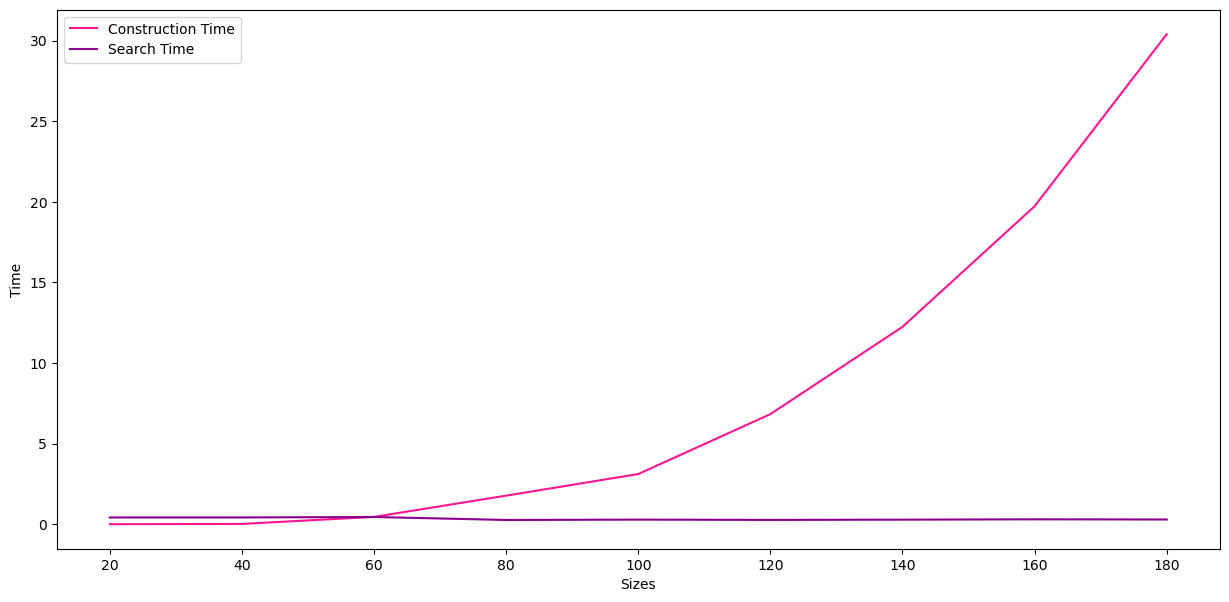

In [100]:
df = compare_time()
df

### Obserwacje:

1. Czas budowania automatu rośnie wykładniczo wraz ze wzrostem rozmiaru wzorca
2. Czas przeszukiwania tekstu w poszukiwaniu wzorca jest stały


## Zadanie 7. Podziel plik na 2, 4 i 8 fragmentów (w poziomie) i porównaj czas przeszukiwania 

In [118]:
def pattern_matching_with_halfime(text, pattern):
    vertical_tt, horizontal_tt, horizontal_accepting_state = create_automaton(pattern)

    search_start = perf_counter()
    occurences = search(text, vertical_tt, horizontal_tt, horizontal_accepting_state, pattern)
    search_end = perf_counter()
    search_time = search_end - search_start

    return search_time

def divide_text():
    text = convert("haystack.png")
    pattern = [line[:25] for line in text[:25]]
    result = []

    for size in [2, 4, 8]:
        search_time = 0
        part_size = len(text) // size
        parts = [text[i * part_size : (i + 1) * part_size] for i in range(size)]
    
        for ntext in parts:
            search_time += pattern_matching_with_halfime(ntext, pattern)
        
        result += [size, search_time]

    df = pd.DataFrame(data={"size": result[::2],
                    "searching time [s]": result[1::2]})
    return df


In [119]:
df = divide_text()
df

,size,searching time [s]
0,2,0.418074
1,4,0.418918
2,8,0.408784


### Obserwacje:
1. Czas przeszukiwania w zależności od rozmiaru zmienia się nieznacznie